# TITANIC SURVIVAL PREDICTION

In [1]:

import pandas as pd  # Import the pandas library for data manipulation and analysis
import numpy as np  # Import the NumPy library for numerical operations and array handling
import matplotlib.pyplot as plt  # Import Matplotlib for creating visualizations (e.g., plots, charts)
import seaborn as sns  # Import Seaborn for advanced statistical data visualization




In [2]:
df = pd.read_csv('Dataset\\Titanic-Dataset.csv') 
# Load the Titanic dataset from a CSV file into a pandas DataFrame



### Data Preprocessing

In [3]:
df.dropna(inplace=True) 
# Remove all rows with missing (NaN) values from the DataFrame


In [4]:

df.drop_duplicates(inplace=True)
# Drop duplicate rows


In [5]:
df.head()  # Display the first 5 rows of the DataFrame


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [6]:

print(df.columns)  # Print the names of all columns in the DataFrame


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)  # Drop the specified columns from the DataFrame



In [8]:
df.head()  # Display the first 5 rows of the DataFrame after dropping the specified columns

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) 
# Convert the 'Sex' column to numerical values using mapping



In [10]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # Convert the 'Embarked' column into one-hot encoded variables, dropping the first category


In [11]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Create a new 'FamilySize' column by adding the 'SibSp' and 'Parch' columns, plus 1



In [12]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
# Remove the 'SibSp' and 'Parch' columns from the DataFrame after creating 'FamilySize'



### Data Visualization 

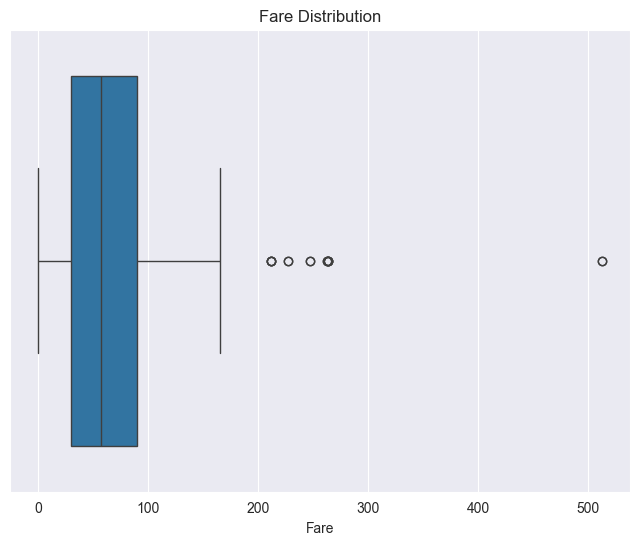

In [13]:
import matplotlib.pyplot as plt  # Import the matplotlib library for creating visualizations
import seaborn as sns  # Import the seaborn library for enhanced visualizations based on matplotlib

# Boxplot for Fare
plt.figure(figsize=(8,6))  # Set the figure size to 8x6 inches
sns.boxplot(x='Fare', data=df)  # Create a boxplot for the 'Fare' column in the DataFrame
plt.title('Fare Distribution')  # Set the title of the plot to 'Fare Distribution'
plt.show()  # Display the plot


0 = Male, 1 = Female


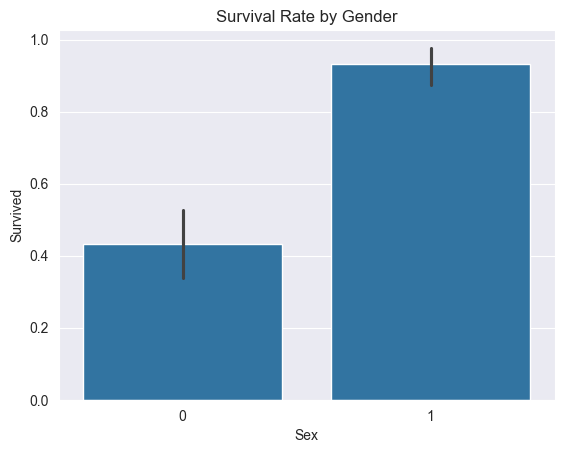

In [14]:
sns.barplot(x='Sex', y='Survived', data=df)  # Create a bar plot showing the relationship between 'Sex' and 'Survived'
plt.title('Survival Rate by Gender')  # Set the title of the plot to 'Survival Rate by Gender'
print("0 = Male, 1 = Female")  # Print a legend explaining the numerical encoding of 'Sex' (0 for male, 1 for female)
plt.show()  # Display the plot


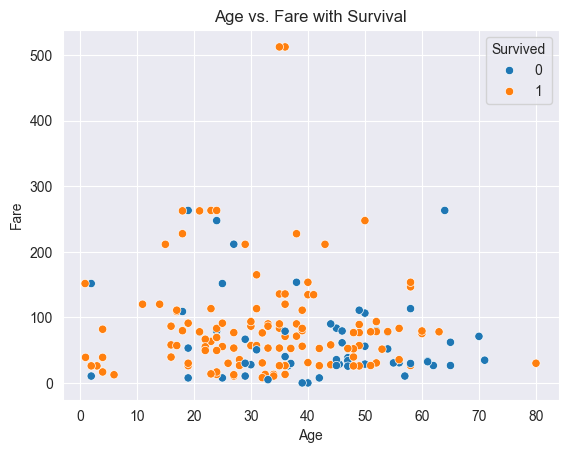

In [15]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df) 
# Create a scatter plot showing the relationship between 'Age' and 'Fare', colored by 'Survived'
plt.title('Age vs. Fare with Survival')  # Set the title of the plot to 'Age vs. Fare with Survival'
plt.show()  # Display the plot


### Implementation of ML model (Logistic Regression)

In [16]:
import pandas as pd  # Data manipulation
from sklearn.model_selection import train_test_split  # Splits data into train/test sets
from sklearn.preprocessing import StandardScaler  # Standardizes features
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Model evaluation metrics



In [17]:
# Define features and target variable
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_S', 'Embarked_Q']]  # Features (independent variables)
y = df['Survived']  # Target variable (dependent variable)


In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)



In [20]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)



LogisticRegression()

In [21]:
# Predict the target variable for the test data using the trained model
y_pred = model.predict(X_test_scaled)



### Model Evaluation 

In [22]:
# Print the Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the Accuracy Score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[15  5]
 [11 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65        20
           1       0.83      0.69      0.75        35

    accuracy                           0.71        55
   macro avg       0.70      0.72      0.70        55
weighted avg       0.74      0.71      0.71        55


Accuracy Score:
0.7090909090909091


### Implementation of ML model (RandomForestClassifier)

In [23]:
# Import the RandomForestClassifier from the ensemble module of scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Import pandas for data manipulation
import pandas as pd

# Import train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import StandardScaler to standardize the features
from sklearn.preprocessing import StandardScaler

# Import classification metrics to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [24]:
# Define features and target variable
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_S', 'Embarked_Q']]
y = df['Survived']

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [26]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)



In [27]:
# Initialize the RandomForestClassifier with 100 trees and a fixed random state
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForestClassifier on the scaled training data
model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [28]:
# Predict the target variable for the test data using the trained Random Forest model
y_pred = model.predict(X_test_scaled)


### Model Evaluation 

In [29]:
# Print the Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the Accuracy Score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[12  8]
 [ 6 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        20
           1       0.78      0.83      0.81        35

    accuracy                           0.75        55
   macro avg       0.73      0.71      0.72        55
weighted avg       0.74      0.75      0.74        55


Accuracy Score:
0.7454545454545455
